In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

This tutorial contains the basics of plotting in Python / Jupyter.
We will mostly relying on Matplotlib and Seaborn, make sure to have those installed !

# Hello world

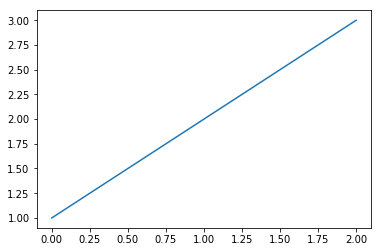

In [2]:
x = [1,2,3]
plt.plot(x)

#### What is the problem ?

No vizualization of the values we obtain: already a line. We also don't know what we are looking at : title? axis? units?

# Line plot

Text(0, 0.5, 'amplitude [V]')

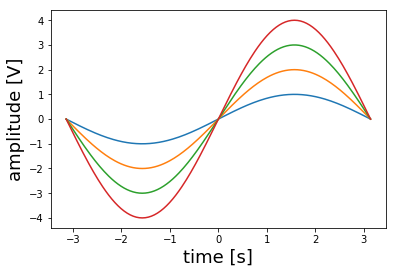

In [3]:
for i in range(1,5):
    x = np.linspace(-np.pi, np.pi, 201)
    plt.plot(x, np.sin(x)*i)
    
plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)

#### What is the problem ?

The line is continuous when we ony computed some points : approximation 

# Error bars

In [51]:
# Data
var1 = np.random.normal(10,1,10000)
var2 = np.random.normal(10,10,10000)
var3 = np.random.normal(10,100,10000)

vars_=[var1, var2, var3]

# Calculate the average
var1_mean = np.mean(var1)
var2_mean = np.mean(var2)
var3_mean = np.mean(var3)

# Calculate the standard deviation
var1_std = np.std(var1)
var2_std = np.std(var2)
var3_std = np.std(var3)

# Define labels, positions, bar heights and error bar heights
labels = ['var1', 'var2', 'var3']
x_pos  = np.arange(len(labels))
CTEs   = [var1_mean, var2_mean, var3_mean]
error  = [var1_std*2, var2_std*2, var3_std*2]

In [52]:
CTEs

[9.999857487873811, 9.904524889430887, 10.630601547210606]

In [53]:
#sns.boxplot(data = vars_)

Here we can easily see that there is a big difference in the distribution of the different samples. 

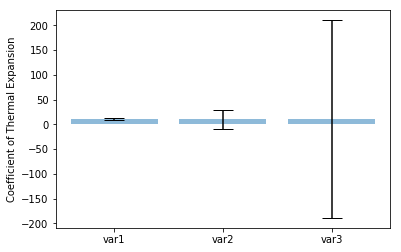

In [54]:
plt.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels)

plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

#### What is the problem ?

we don't see any diffence between them because it is a small difference. Maybe plotting the scatter plot matrix or somethong else that let you see the difference would be better. We can see that there is a difference by plotting the CTEs. Maybe we could also use the informations we have on the error.

Now we can see we have a really different distribution !!!

# Markers / legend

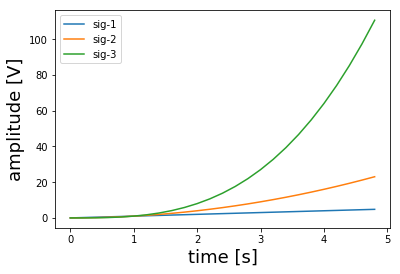

In [9]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, label="sig-1")
plt.plot(t, t**2, label="sig-2")
plt.plot(t, t**3, label="sig-3")

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

#### What is the problem ?

In [10]:
# ...

# Non-linear scale

In [48]:
mu, sigma = 3., 1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)
#s = np.log(s)

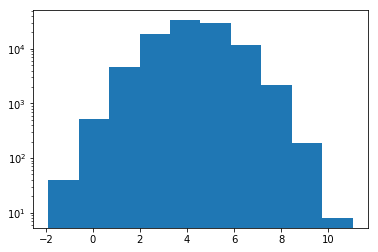

In [50]:
#_ = plt.hist(s)
_ = plt.hist(np.log2(s), log=True)

#### What is the problem?

la représentation ne nous donne aucune information car on a une valeure outlier qui sort du lot, on peut changer d'échelle pour obtenir qqch de plus visible. on peut passer en echelle logarithmique. 

Now, we have datas at the same scale and we can start comparing them together. 

# Seaborn !

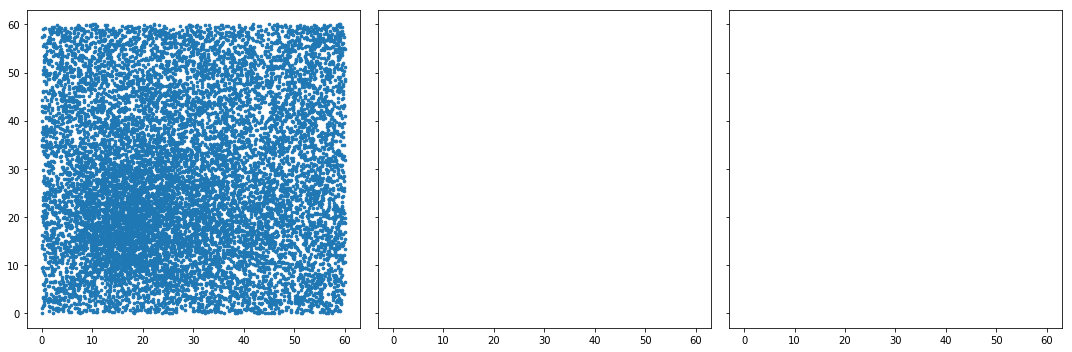

In [14]:
mu, sigma = 3., 0.5 # mean and standard deviation
x = np.random.lognormal(mu, sigma, 3000)
y = np.random.lognormal(mu, sigma, 3000)
x[x>60] = np.mean(x)
y[y>60] = np.mean(y)
x = np.append(x,np.random.uniform(0,60,10000))
y = np.append(y,np.random.uniform(0,60,10000))

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].scatter(x, y, s=7)

f.tight_layout()

#### What is the problem ?

In [15]:
# ...

# Resources

* [Matplotlib gallery](https://matplotlib.org/gallery.html)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [D3 gallery](https://github.com/d3/d3/wiki/Gallery)